# Script to deploy the pytorch network using ONNXRuntime

## Load local directory and resources. 

In [1]:

import onnxruntime as ort
import os 
from PIL import Image
import numpy as np 
from one_g import ToTensor

print(f'ONNX RT Device is {ort.get_device()}')

DEPLOY_INPUT_DIR='deploy/input'
DEPLOY_OUTPUT_DIR='deploy/output'


os.makedirs(DEPLOY_OUTPUT_DIR,exist_ok=True)

filenames = [os.path.join(DEPLOY_INPUT_DIR,_) for _ in os.listdir(DEPLOY_INPUT_DIR)
           if os.path.isfile(os.path.join(DEPLOY_INPUT_DIR,_)) and _.endswith('.jpg')]

ONNX RT Device is CPU


## Load the onnxruntime model

In [2]:
ort_sess = ort.InferenceSession('torch_script_models/onnx_model.pt')
import torch
transform = ToTensor()

import time



## Inference time estimation. 

In [3]:

start_time = time.time()


for f_ in filenames:
  original_img = Image.open(f_)
  original_img = np.asarray(original_img)
  img = transform({'input':original_img[:,:,:3]})['input']
  inputs = torch.unsqueeze(img,0)

  outputs = ort_sess.run(None, {'input': inputs.numpy()})

print(f'Total time = {time.time()-start_time,} and time taken per sample ={(time.time()-start_time)/len(filenames)}')


Total time = (1.3216357231140137,) and time taken per sample =0.0293700377146403


## Inference and Model Output Formatting.

Filename : deploy/input/13-57-21.jpg


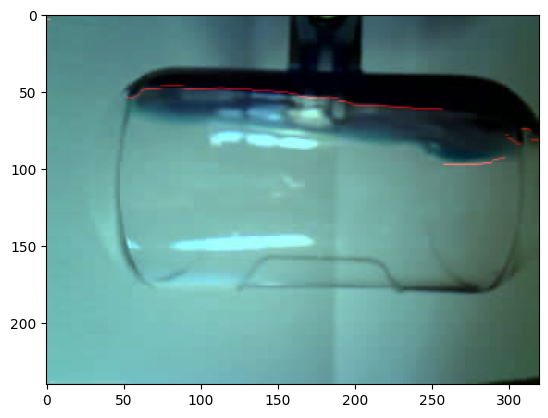

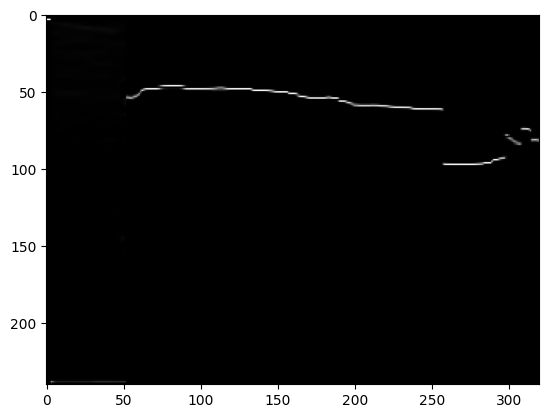

Filename : deploy/input/15-50-32.jpg


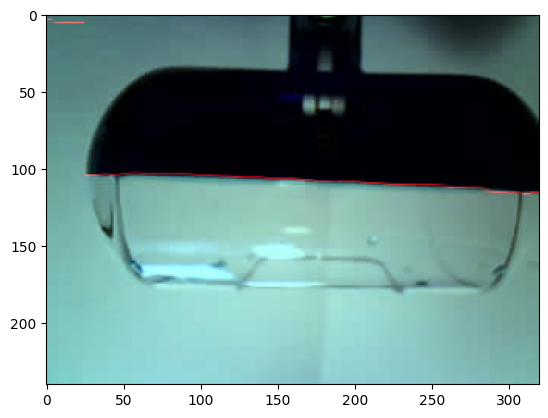

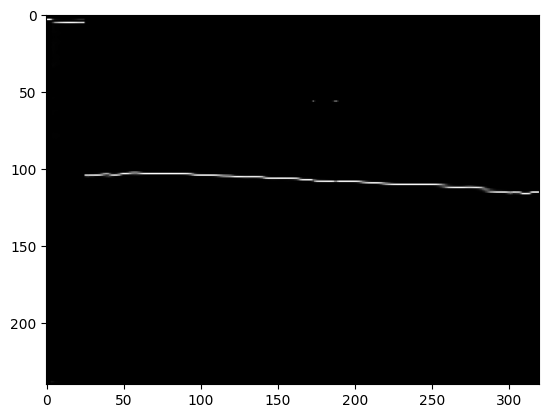

Filename : deploy/input/15-50-35.jpg


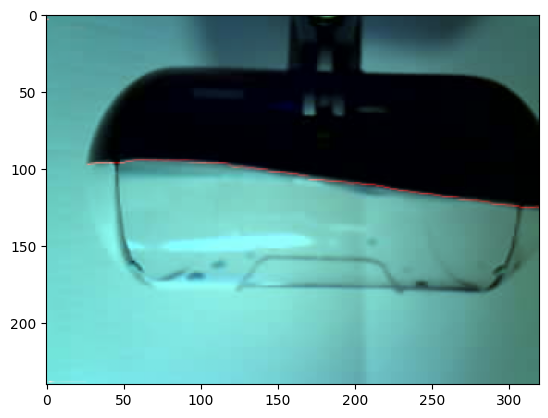

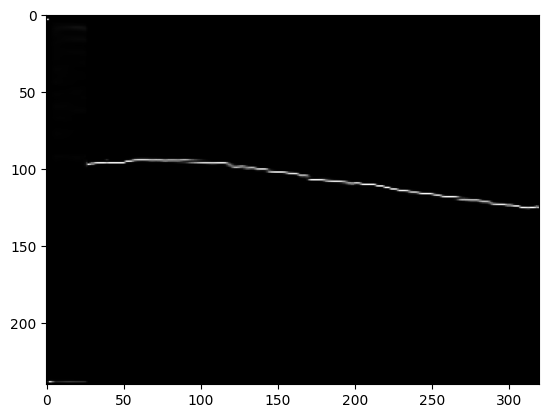

Filename : deploy/input/15-57-30.jpg


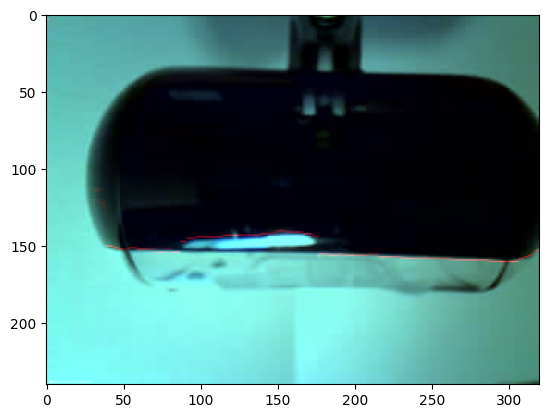

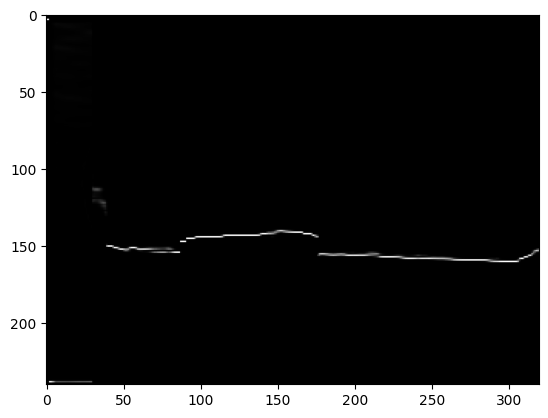

Filename : deploy/input/15-50-47.jpg


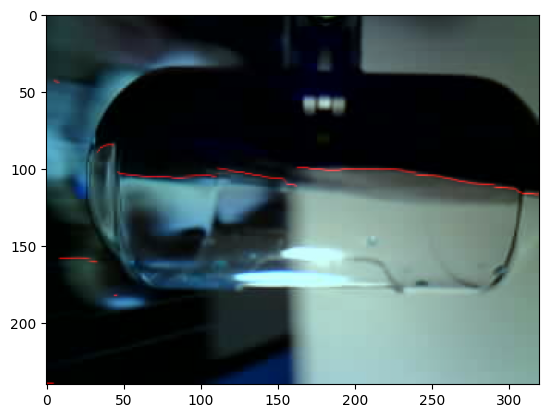

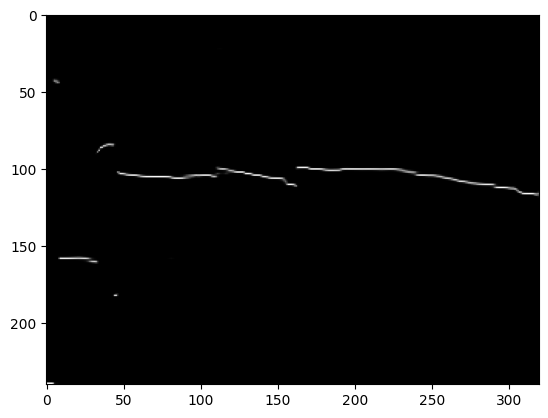

Filename : deploy/input/15-50-40.jpg


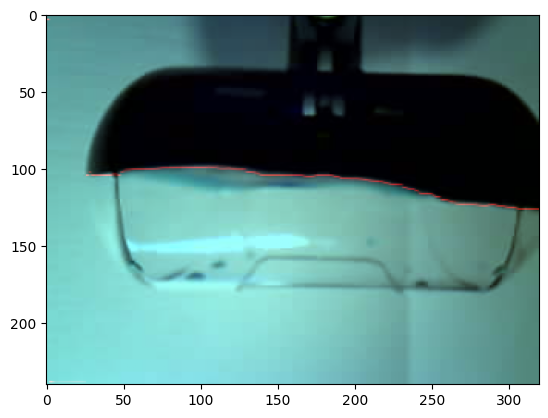

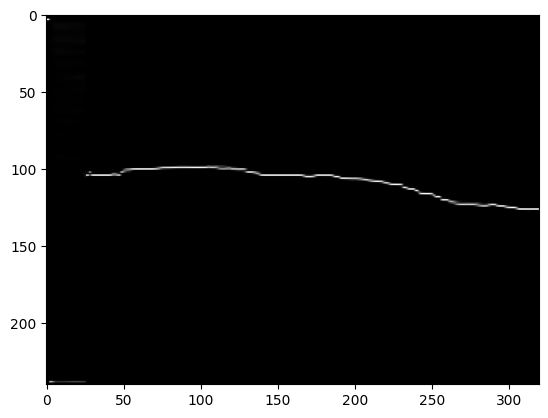

Filename : deploy/input/13-57-13.jpg


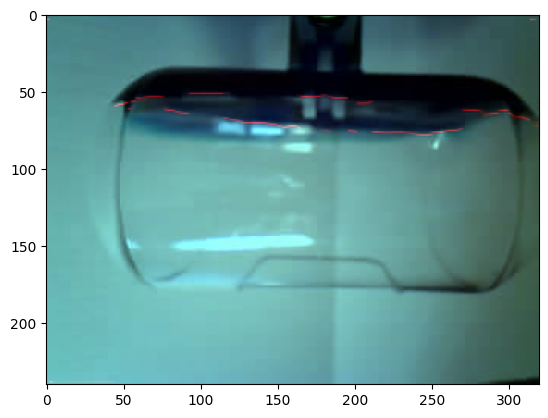

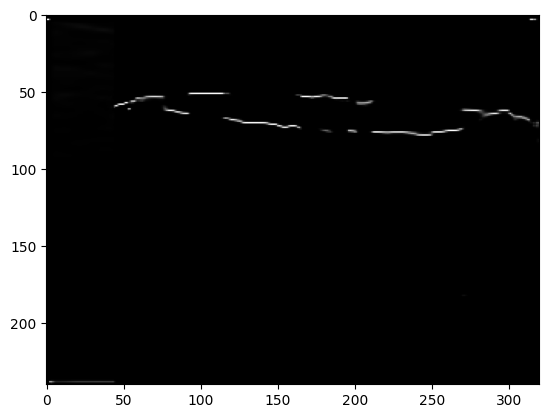

Filename : deploy/input/13-57-14.jpg


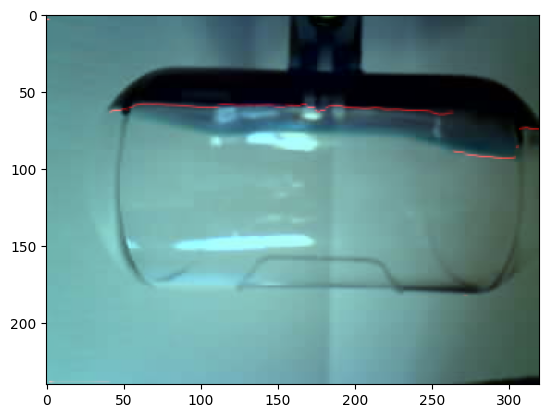

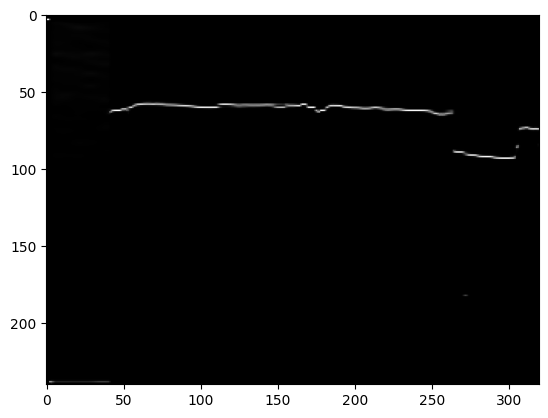

Filename : deploy/input/15-57-26.jpg


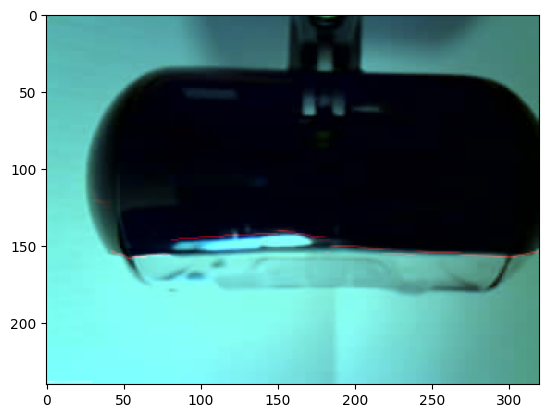

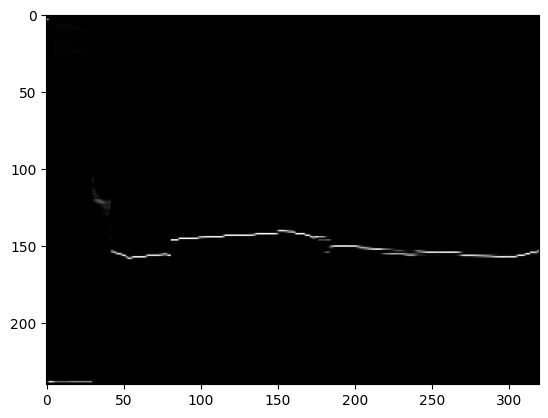

Filename : deploy/input/15-57-21.jpg


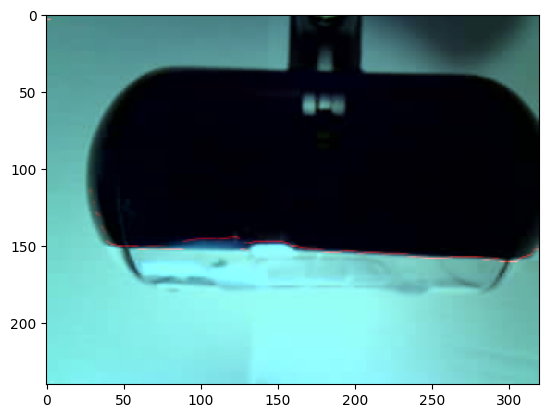

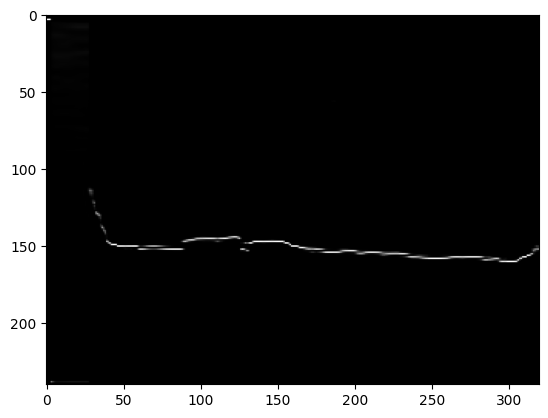

Filename : deploy/input/15-57-28.jpg


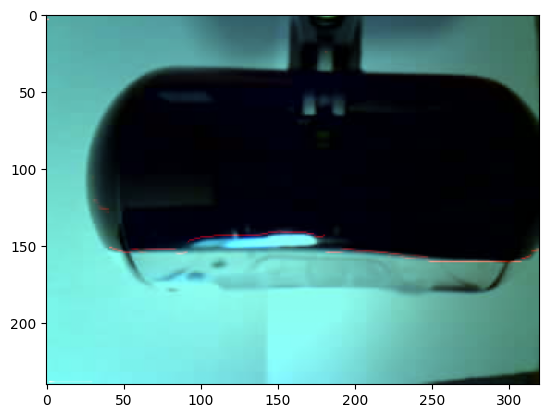

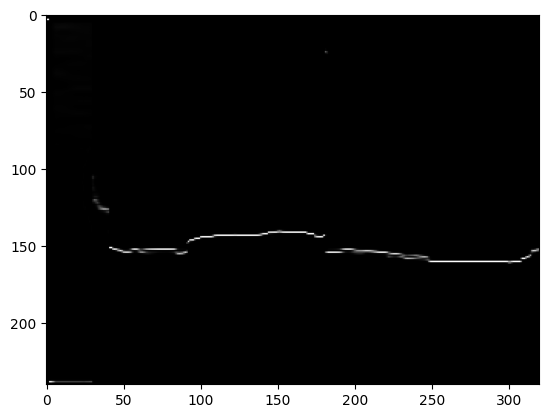

Filename : deploy/input/13-57-15.jpg


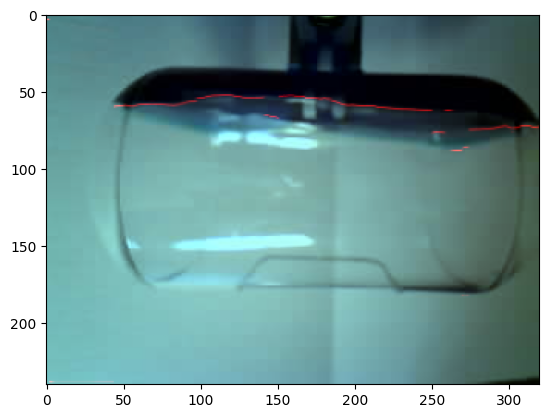

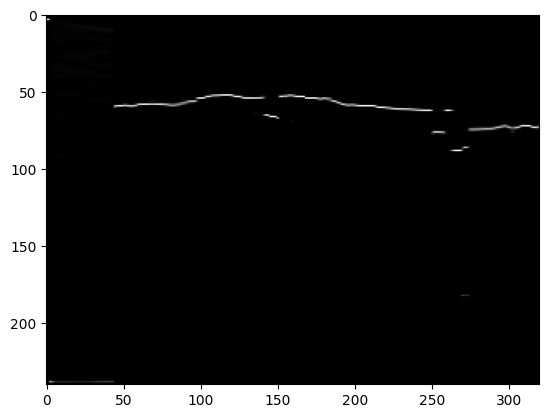

Filename : deploy/input/13-57-12.jpg


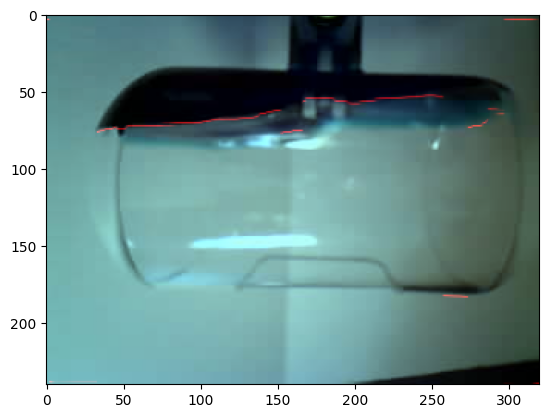

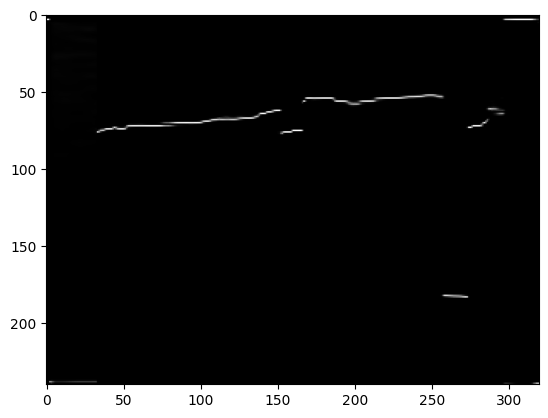

Filename : deploy/input/15-50-41.jpg


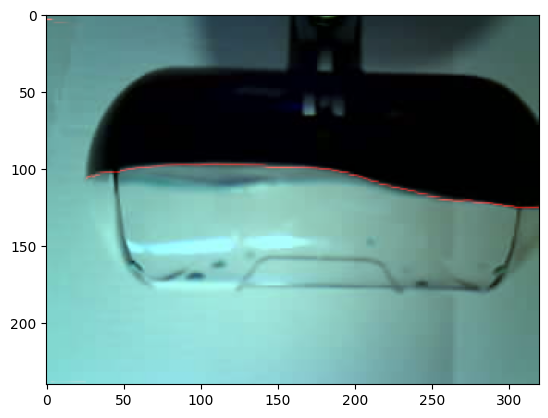

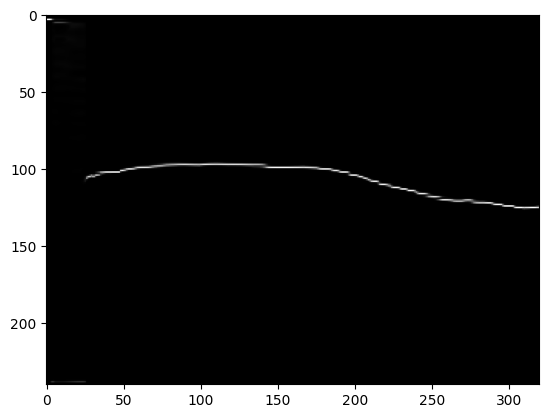

Filename : deploy/input/15-57-31.jpg


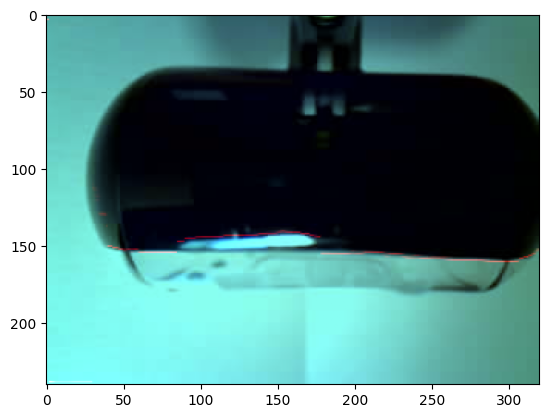

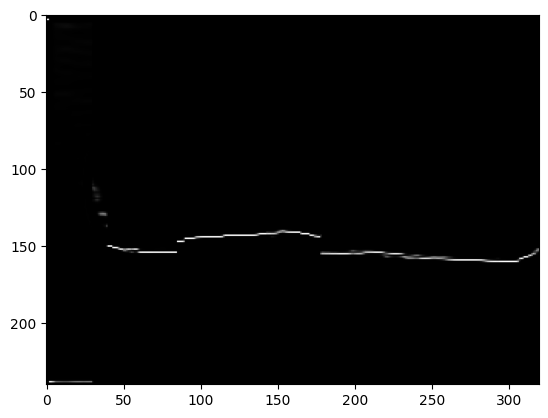

Filename : deploy/input/15-50-46.jpg


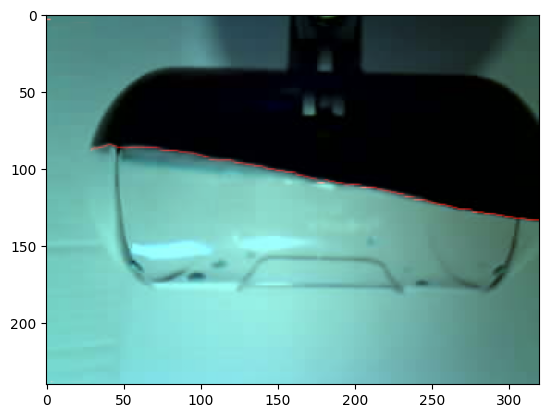

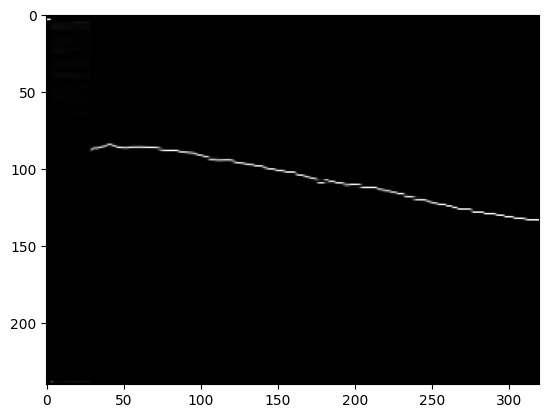

Filename : deploy/input/15-50-34.jpg


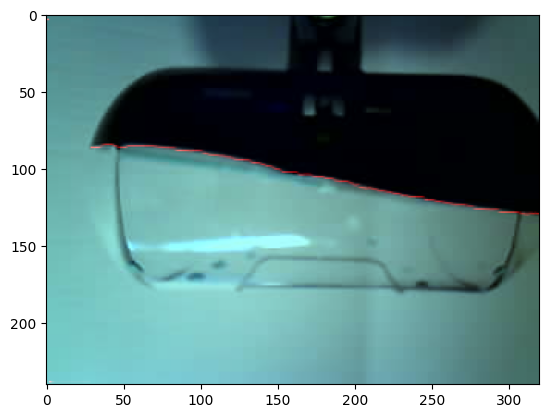

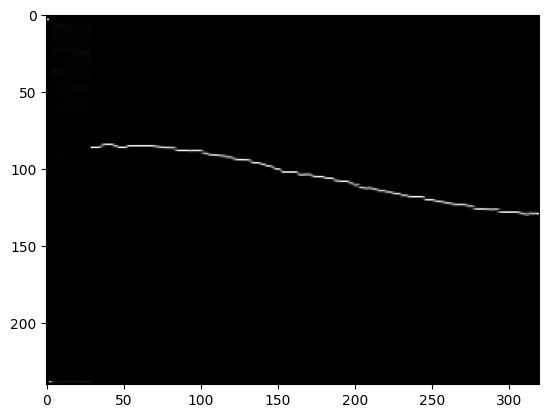

Filename : deploy/input/13-57-20.jpg


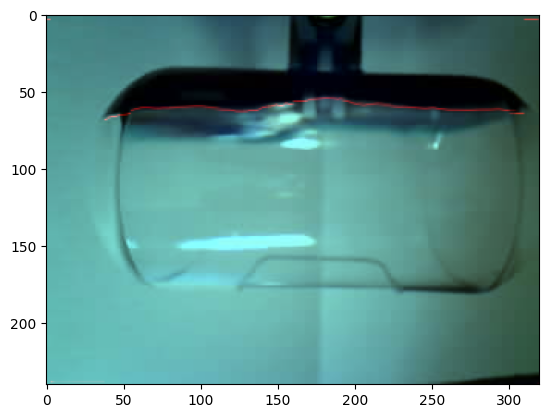

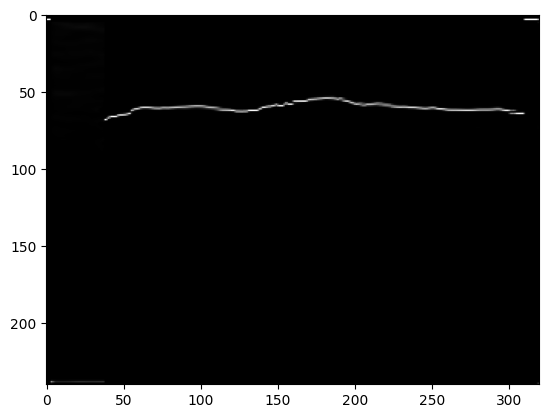

Filename : deploy/input/15-50-33.jpg


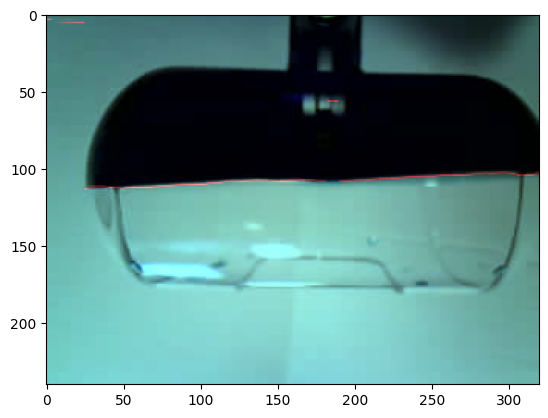

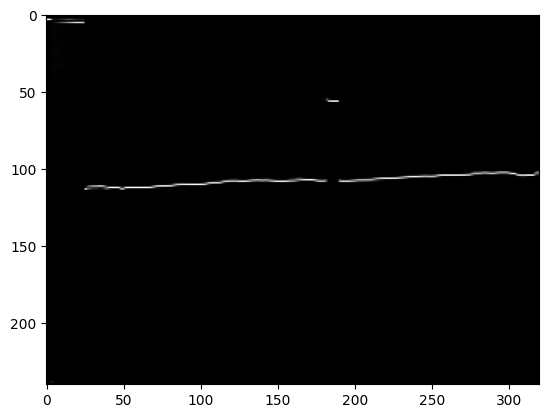

Filename : deploy/input/15-57-29.jpg


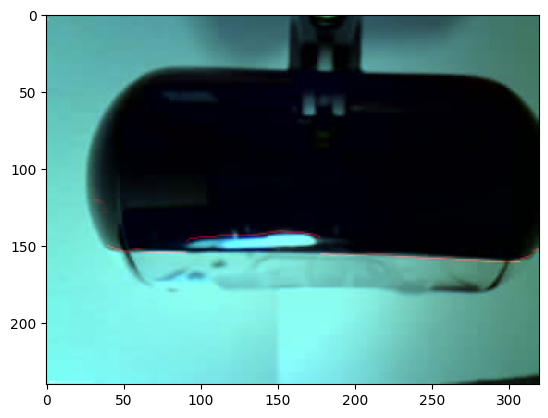

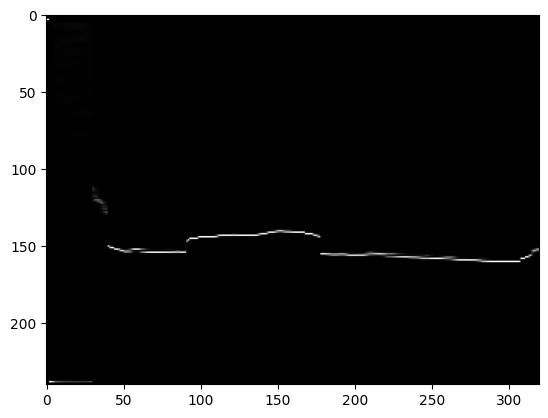

Filename : deploy/input/15-57-27.jpg


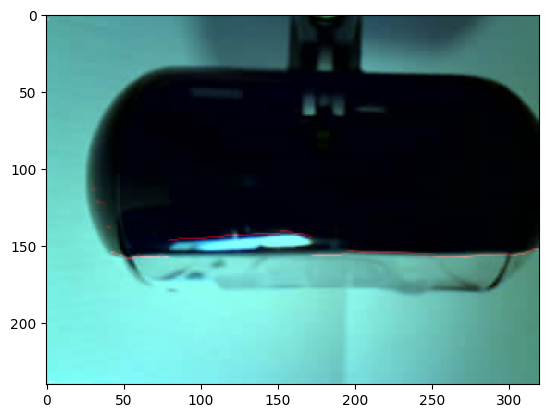

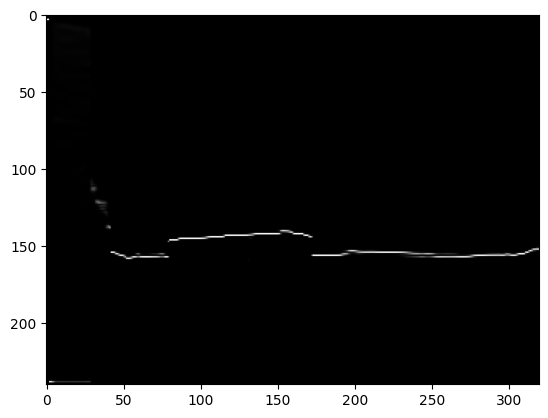

Filename : deploy/input/15-57-24.jpg


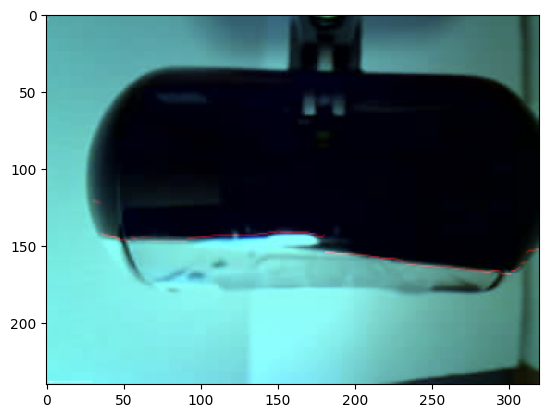

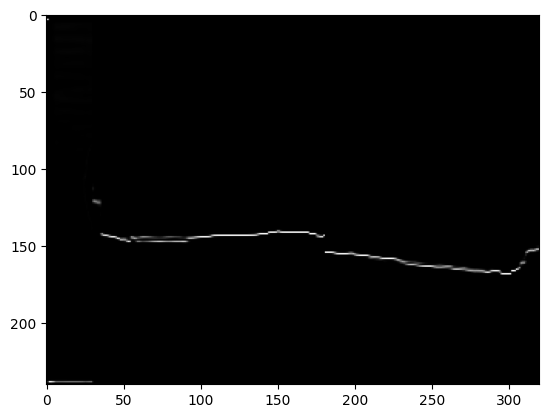

Filename : deploy/input/15-57-23.jpg


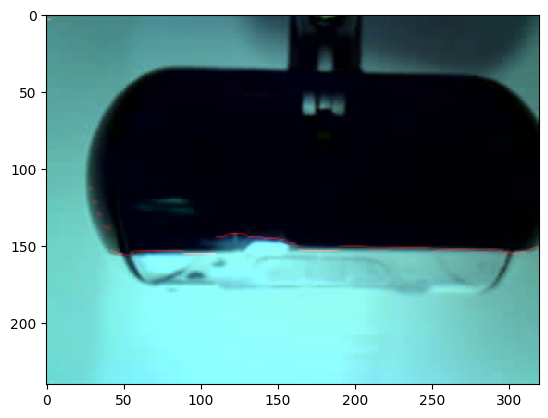

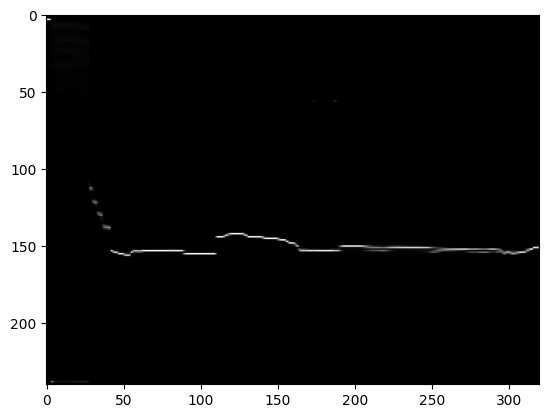

Filename : deploy/input/13-57-09.jpg


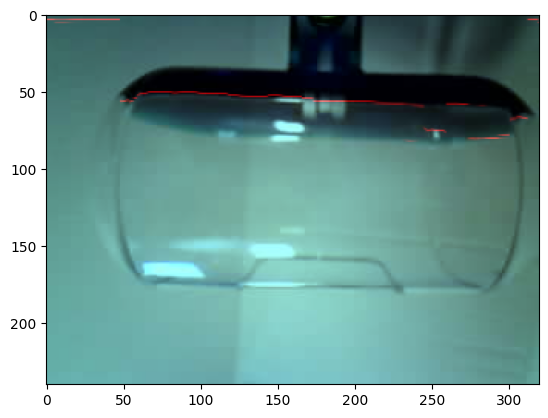

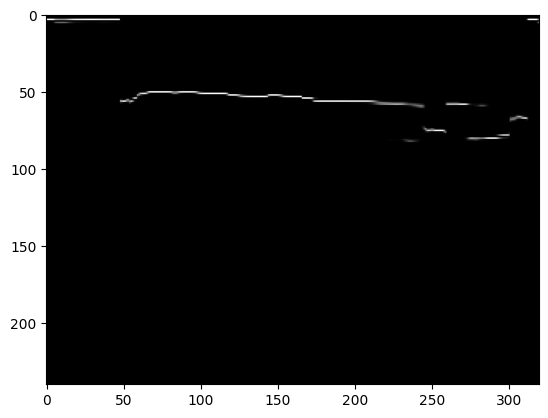

Filename : deploy/input/13-57-11.jpg


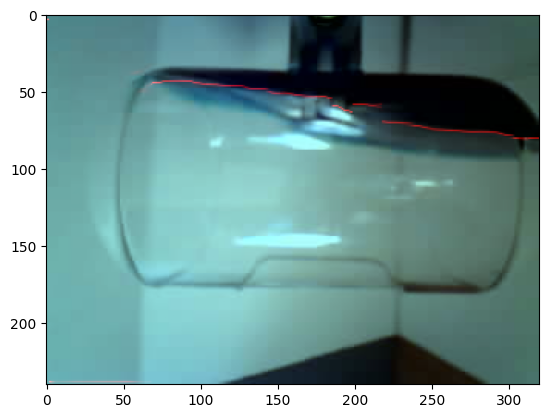

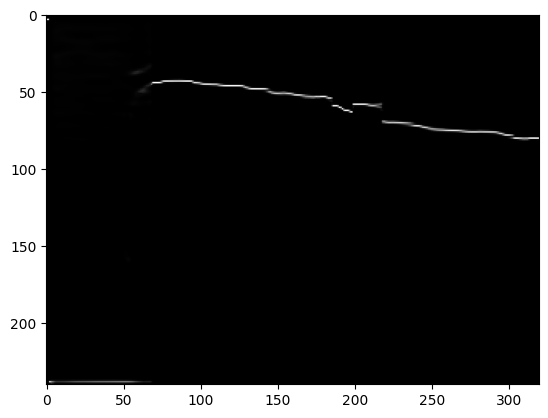

Filename : deploy/input/13-57-16.jpg


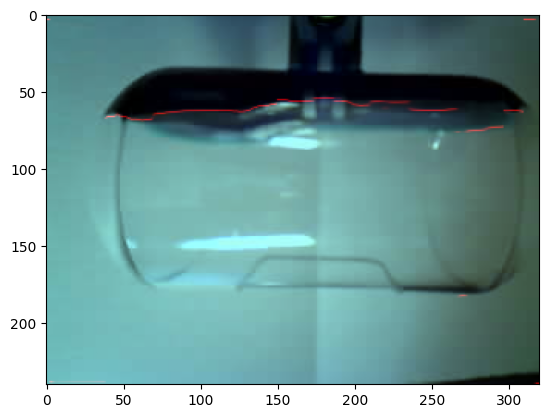

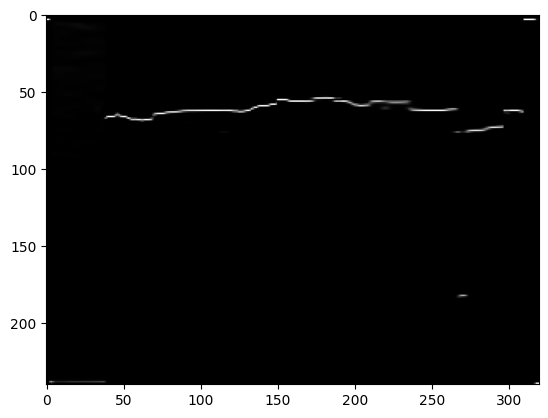

Filename : deploy/input/13-57-18.jpg


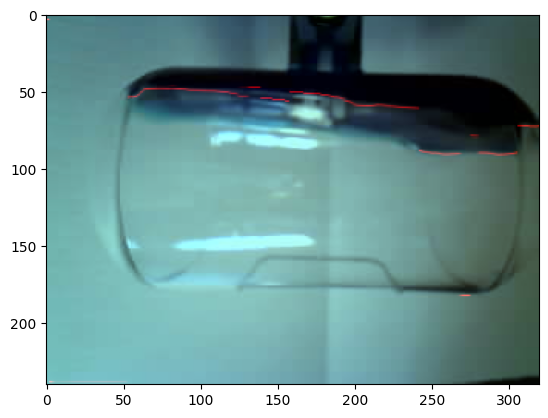

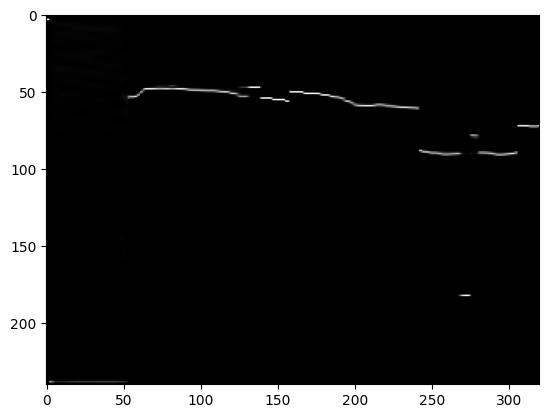

Filename : deploy/input/15-50-39.jpg


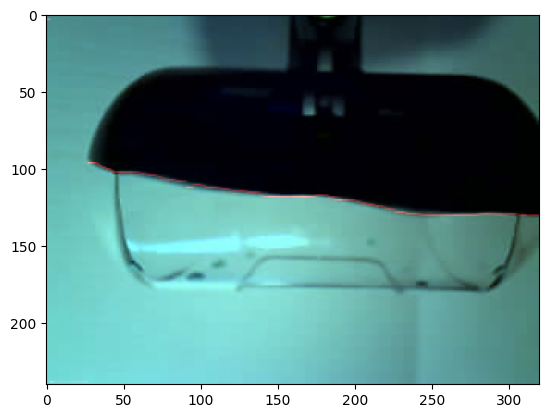

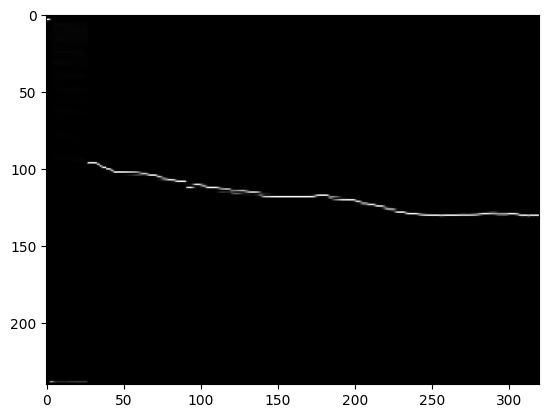

Filename : deploy/input/15-57-32.jpg


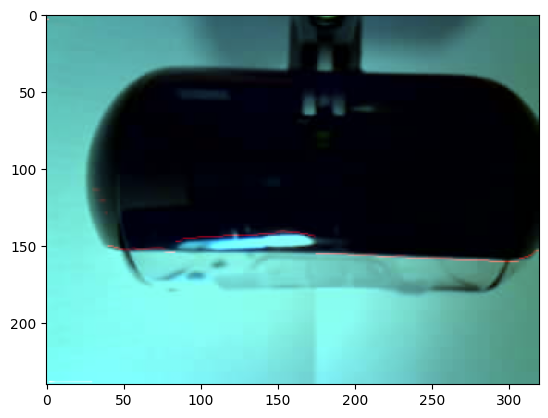

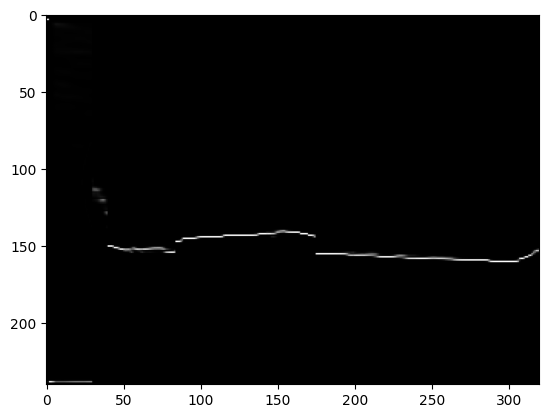

Filename : deploy/input/15-50-45.jpg


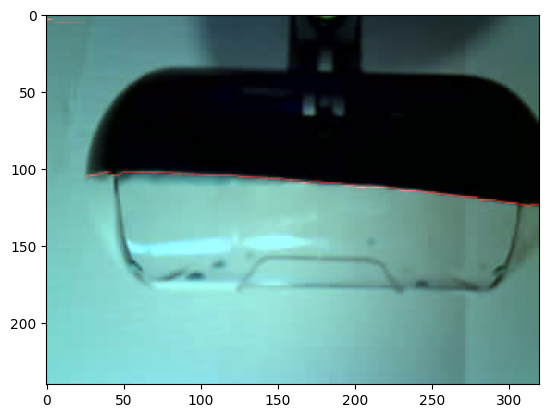

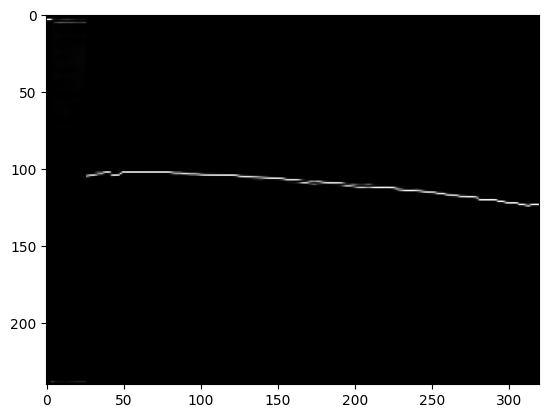

Filename : deploy/input/15-50-42.jpg


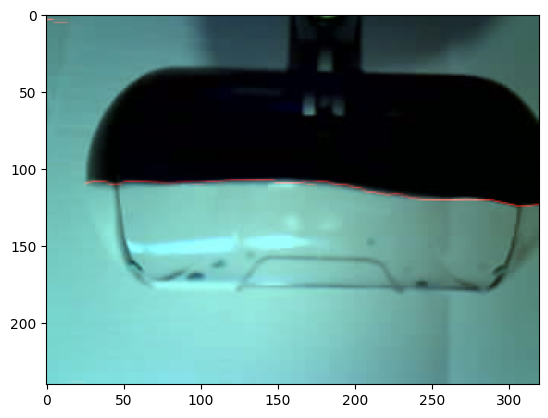

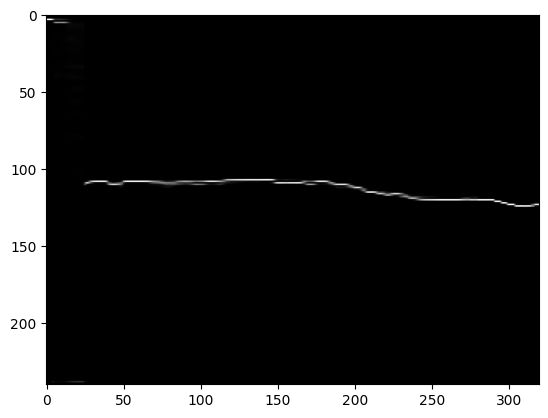

Filename : deploy/input/13-57-23.jpg


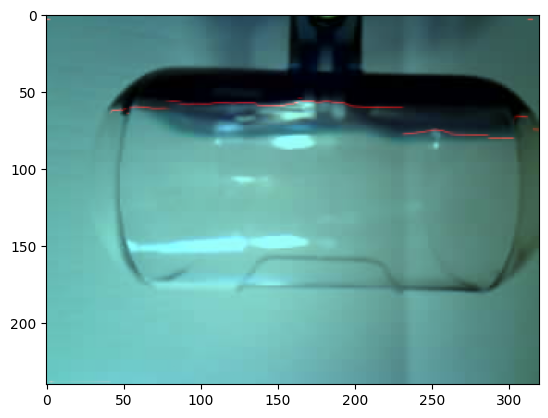

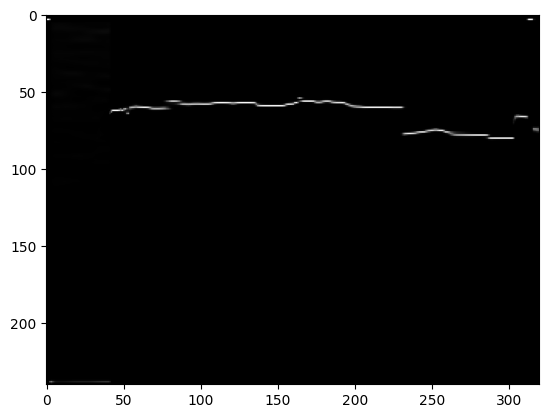

Filename : deploy/input/15-50-37.jpg


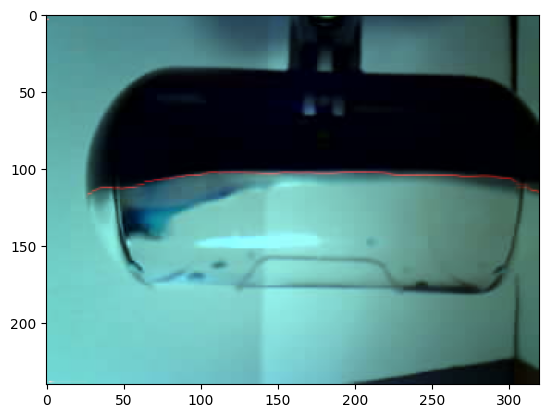

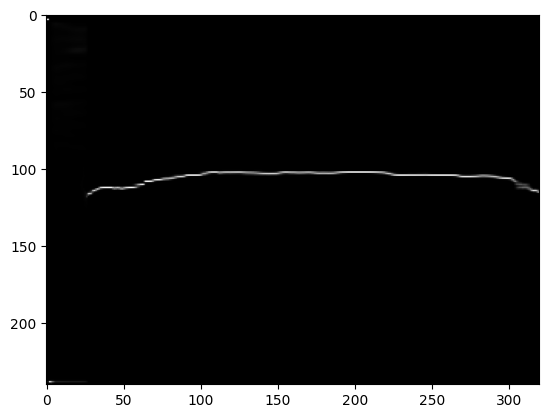

Filename : deploy/input/15-57-22.jpg


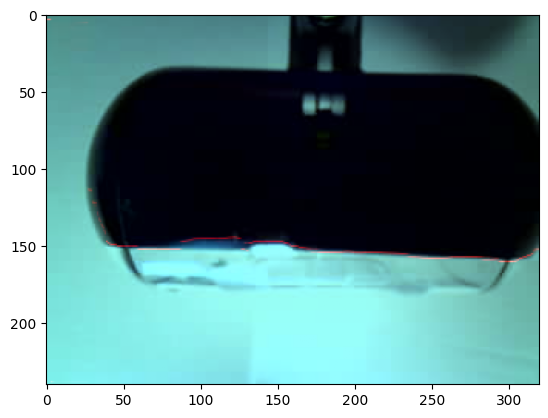

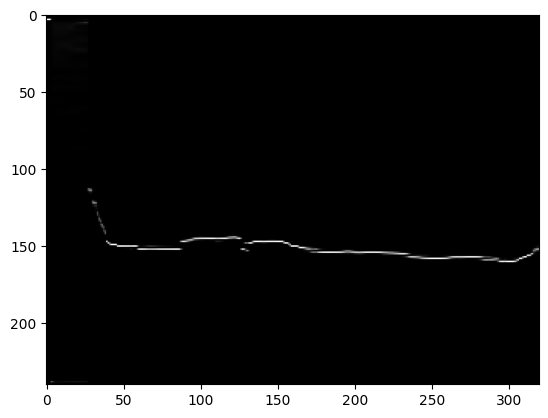

Filename : deploy/input/15-57-25.jpg


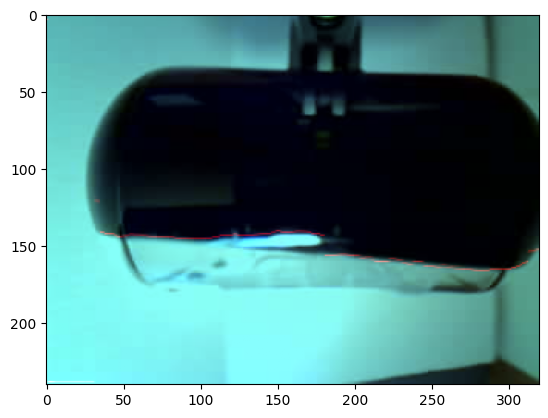

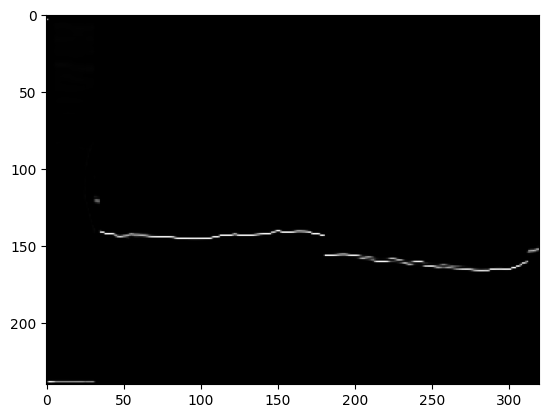

Filename : deploy/input/15-50-36.jpg


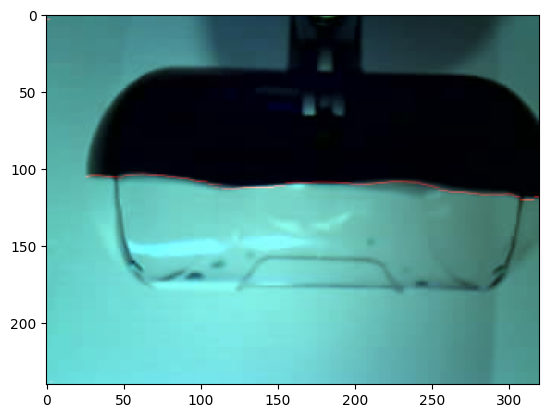

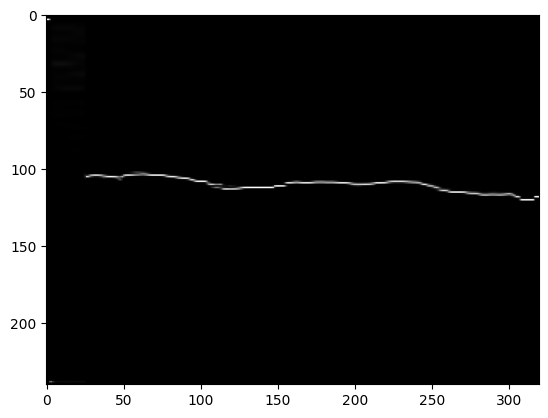

Filename : deploy/input/13-57-22.jpg


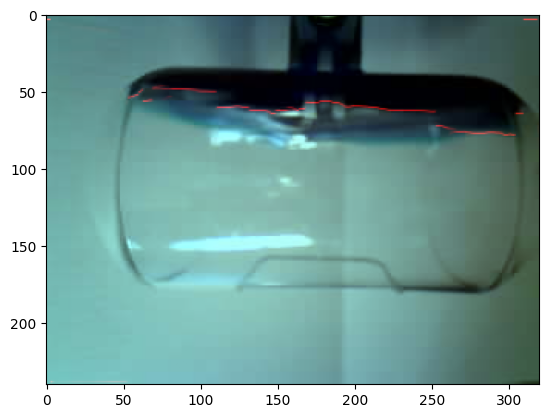

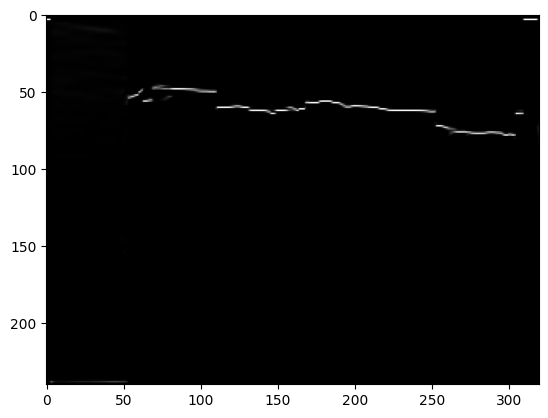

Filename : deploy/input/15-50-31.jpg


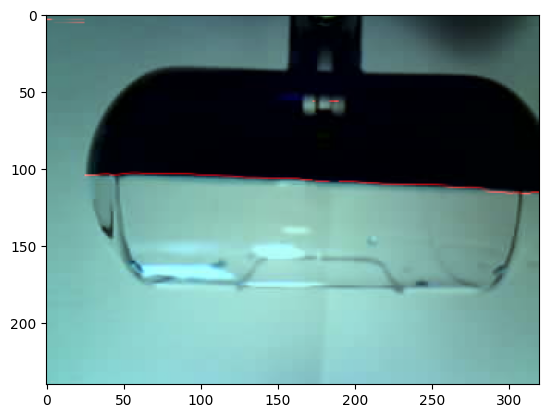

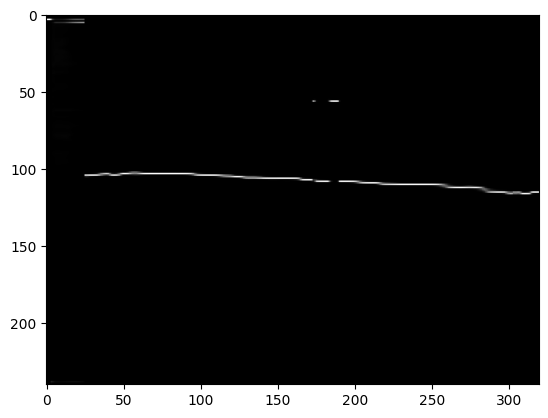

Filename : deploy/input/15-50-43.jpg


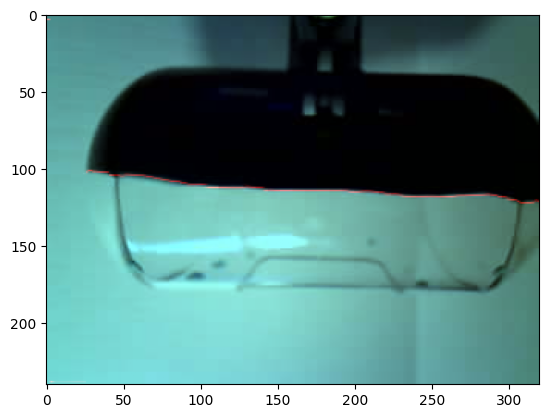

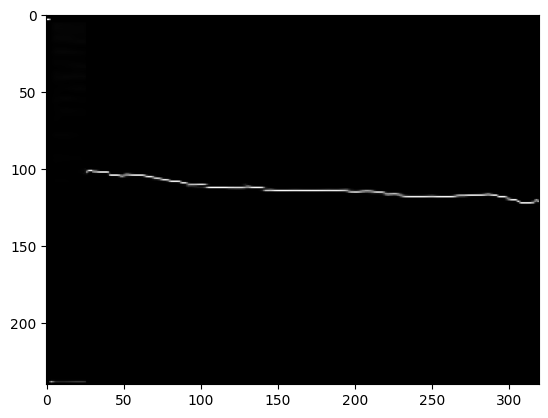

Filename : deploy/input/15-57-33.jpg


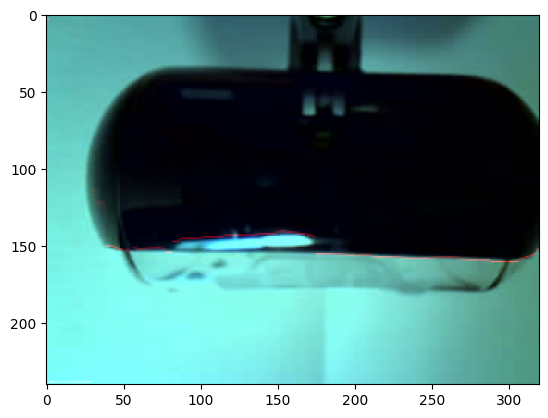

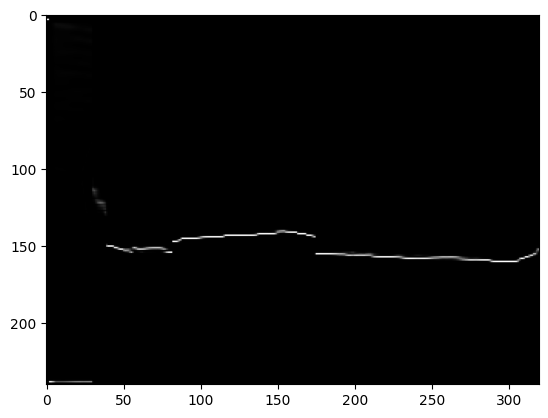

Filename : deploy/input/15-50-38.jpg


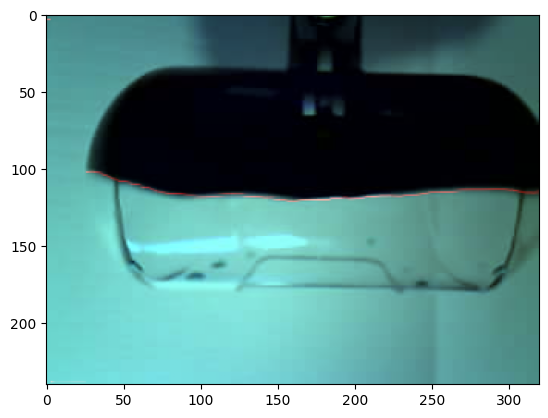

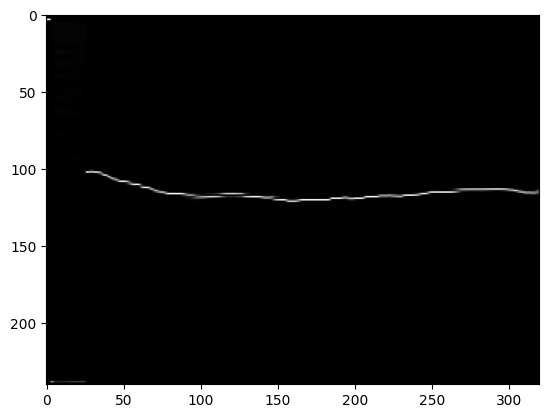

Filename : deploy/input/15-50-44.jpg


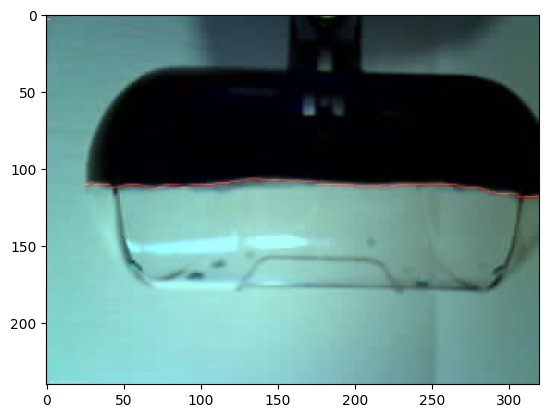

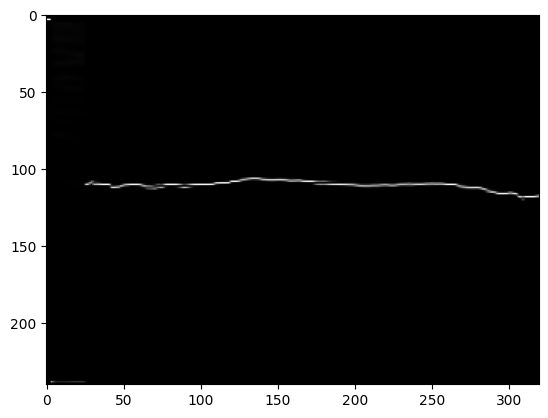

Filename : deploy/input/13-57-19.jpg


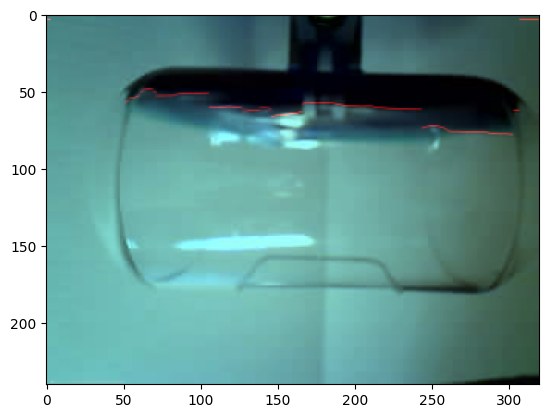

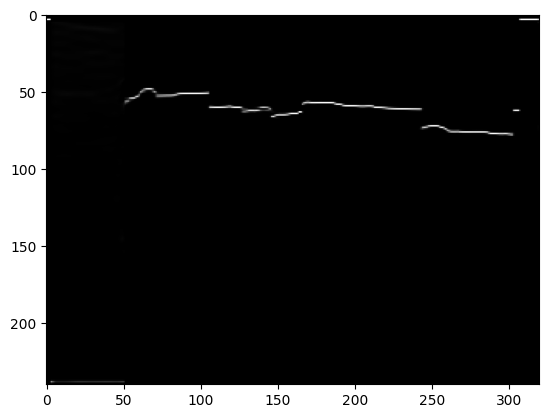

Filename : deploy/input/13-57-17.jpg


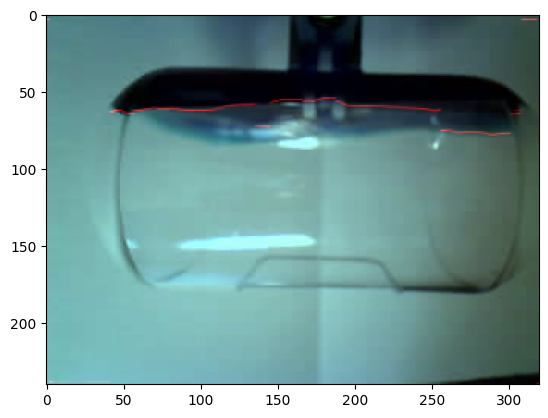

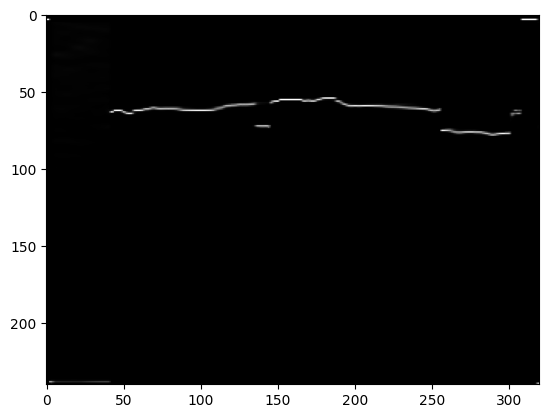

Filename : deploy/input/13-57-10.jpg


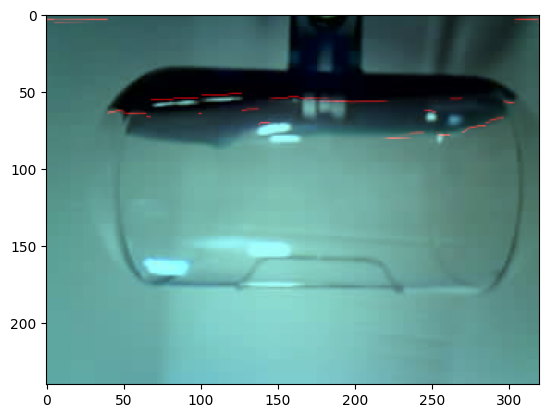

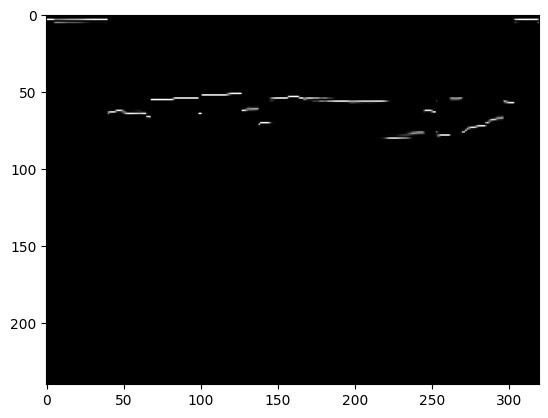

In [4]:
import matplotlib.pyplot as plt


for f_ in filenames:
    original_img = Image.open(f_)
    original_img = np.asarray(original_img)
    img = transform({'input':original_img[:,:,:3]})['input']
    inputs = torch.unsqueeze(img,0)
    img = img.cpu().detach().numpy().transpose((1,2,0))

    outputs = ort_sess.run(None, {'input': inputs.numpy()})[0]

    img[:,:,0] +=outputs[0]
    img[:,:,0] = img[:,:,0]/img[:,:,0].max()
    base_filename = os.path.basename(f_)
    print(f'Filename : {f_}')
    plt.imshow(img)
    plt.show()

    plt.imshow(outputs[0],cmap='gray')
    plt.show()

